<a href="https://colab.research.google.com/github/akshay-121/SURP-Animal-species-detection-from-videos/blob/main/R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

import cv2
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3



In [ ]:
def getrect(img):
  ss=cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
  ss.setBaseImage(img)
  ss.switchToSelectiveSearchFast()
  rects=ss.process()
  ans=[]
  for i in range(min(2000,len(rects))):
    x,y,w,h=rects[i]
    if w>=0.35*np.shape(img)[1] and h>=0.3*np.shape(img)[0]:
      ans.append([x,y,w,h])
  return ans

In [ ]:
inp=Input(shape=(224,224,3))
res=ResNet50(include_top=False,weights='imagenet',input_tensor=Input(shape=(224,224,3)))
x=res.output
x = GlobalAveragePooling2D()(x)
#x=Flatten()(x)
#print(x)
x=Dense(4,activation='softmax')(x)
model=Model(res.input,x)

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!pip3 install -r /content/OIDv4_ToolKit/requirements.txt

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 30.88 MiB/s, done.
Resolving deltas: 100% (146/146), done.
     |████████████████████████████████| 3.6MB 8.1MB/s 
     |████████████████████████████████| 7.6MB 39.1MB/s 
     |████████████████████████████████| 552kB 39.9MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: botocore 1.20.99 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
  Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1


In [ ]:
!python /content/OIDv4_ToolKit/main.py downloader --classes Tiger --type_csv train --limit 100
!python /content/OIDv4_ToolKit/main.py downloader --classes Deer --type_csv train --limit 100
!python /content/OIDv4_ToolKit/main.py downloader --classes Lion --type_csv train --limit 100
!python /content/OIDv4_ToolKit/main.py downloader --classes Zebra --type_csv train --limit 100


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Tiger.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 45496 KB/s, 0 seconds passed
[DOWNLOAD] | File cl

In [ ]:
import glob
x=[]
y=[]
path='OID/Dataset/train/'
for i in ['Lion','Tiger','Deer','Zebra']:
  for file in glob.glob(path+i+'/*.jpg'):
    im=cv2.imread(file)
    im=cv2.resize(im,(224,224))
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im=np.array(im)
    if i == 'Lion':
      label=np.array([1,0,0,0])
    if i == 'Tiger':
      label=np.array([0,1,0,0])
    if i == 'Deer':
      label=np.array([0,0,1,0])
    if i == 'Zebra':
      label=np.array([0,0,0,1])
    x.append(im)
    y.append(label)
x=np.array(x)
y=np.array(y)

In [ ]:
res.trainable=False
model.compile(loss='categorical_crossentropy')

In [ ]:
print(np.shape(x))
print(np.shape(y))

(400, 224, 224, 3)
(400, 4)


In [ ]:
history=model.fit(x=x,y=y,batch_size=20,epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 39ms/step - loss: 0.1935
Epoch 2/100
20/20 [==============================] - 1s 39ms/step - loss: 0.1008
Epoch 3/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0559
Epoch 4/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0316
Epoch 5/100
20/20 [==============================] - 1s 38ms/step - loss: 0.0121
Epoch 6/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0035
Epoch 7/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0016
Epoch 8/100
20/20 [==============================] - 1s 39ms/step - loss: 0.0010
Epoch 9/100
20/20 [==============================] - 1s 39ms/step - loss: 8.9885e-04
Epoch 10/100
20/20 [==============================] - 1s 38ms/step - loss: 5.1959e-04
Epoch 11/100
20/20 [==============================] - 1s 38ms/step - loss: 2.7574e-04
Epoch 12/100
20/20 [==============================] - 1s 39ms/step - loss: 1.4731e-04
Epoch 13/

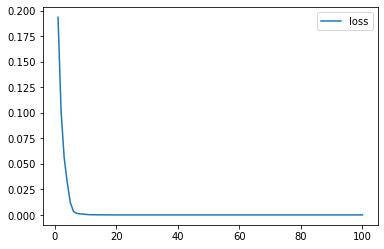

In [ ]:
plt.plot(np.arange(1,101),history.history['loss'],label='loss')
#plt.plot(np.arange(1,101),history.history['accuracy'],label='accuracy')
plt.legend()
plt.show()

In [ ]:
def pred(img):
  rects=getrect(img)
  ans=[]
  for rect in rects:
    a,b,c,d=rect 
    tempimage=img[b:b+d,a:a+c]
    tempimage=cv2.resize(tempimage,(224,224))
    tempimage=np.reshape(tempimage,(1,224,224,3))
    result=model.predict(tempimage)[0]
    ind=np.argmax(result)
    if result[ind]>0.8:
      ans.append([ind,result[ind],a,b,c,d])
  return ans



In [ ]:
testim=cv2.imread('OID/Dataset/train/Tiger/08d1b88885af1c8e.jpg')
testim=cv2.cvtColor(testim,cv2.COLOR_BGR2RGB)
boxes=pred(testim)

In [ ]:
from tensorflow.image import  *
tempboxes=[i[2:] for i in boxes]
scores=[i[1] for i in boxes]
boxind=non_max_suppression(tempboxes,scores,1).numpy()
boxind=np.reshape(boxind,(1))
boxind=np.array(boxind,dtype=np.int)
dic={0:'Lion',1:'Tiger',2:'Deer',3:'Zebra'}
for i in boxind:
  ind=int(i)
  a,b,c,d=boxes[ind][2:]
  out=cv2.rectangle(testim,(a,b),(a+c,b+d),(0,255,0),(2))
  cv2.putText(out,dic[lab],(a,b-10),cv2.FONT_HERSHEY_SIMPLEX,0.9,(36,255,12),2)

plt.imshow(out)
plt.show()
